In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
def load_dataset_and_create_diff_column(filename):
    df = pd.read_csv(filename, index_col=0)
    df['diff'] =  (df['filtered_size'] * 100) / df['original_size']
    df['porcentagem_reduzida'] = 100 - df['diff']
    df.sort_values(by='cloud', inplace=True)
    
    return df

def get_stats(df):
    pr_mean = df['porcentagem_reduzida'].mean()
    pr_var = df['porcentagem_reduzida'].var()
    print('Porcentagem reduzida')
    print('  Média: {}\n  Variância: {}'.format(
        pr_mean,
        pr_var
    ))
    
    n_points = df['original_size'].isna().sum()
    print('Número de pontos que não possuem o ponto fiducial marcado: {}'.format(n_points))
    
    ma, mi = df['filtered_size'].max(), df['filtered_size'].min()
    print('Informações do tamanho da nuvem filtrada:')
    print('  Máximo: {}\n  Mínimo: {}\n  Média: {}\n  Variância: {}'.format(
        ma,
        mi,
        df['filtered_size'].mean(),
        df['filtered_size'].var()
    ))
    
    return pr_mean, pr_var, n_points, ma, mi

In [3]:
def summary(df):
    r = get_stats(df)
    df_true = df.loc[df['contains'] == 1]
    n = len(df)-r[2]
    print('Contém: {} ({:.1f}%)'.format(len(df_true), ((len(df_true)*100)/n)))
    df_false = df.loc[df['contains'] == 0]
    print('Contém: {} ({:.1f}%)'.format(len(df_false), ((len(df_false)*100)/n)))
    return df_true, df_false

# Resultados v1 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.0075]
- Anisotropia: [0.86, 0.94]

In [4]:
dfrev1 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v1.csv')

In [5]:
_ = summary(dfrev1)

Porcentagem reduzida
  Média: 97.93980461331431
  Variância: 0.46358951412708954
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 2440.0
  Mínimo: 114.0
  Média: 765.0990825688074
  Variância: 68419.96586288835
Contém: 2101 (48.2%)
Contém: 2259 (51.8%)


# Resultados v2 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.007]
- Shape Index: [-1, -0.6]

In [6]:
dfrev2 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v2.csv')

In [7]:
true, false = summary(dfrev2)

Porcentagem reduzida
  Média: 97.13108901116344
  Variância: 1.2437677925111807
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 5345.0
  Mínimo: 153.0
  Média: 1070.3311926605504
  Variância: 192532.42940073367
Contém: 2758 (63.3%)
Contém: 1602 (36.7%)


In [8]:
false['type'].value_counts()

LFAU    551
YR      186
E       173
UFAU    171
PR      146
O       135
N        92
CR       88
CAU      56
IGN       4
Name: type, dtype: int64

# Resultados v3 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

In [9]:
dfrev3 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v3.csv')

In [10]:
true, false = summary(dfrev3)

Porcentagem reduzida
  Média: 94.83599115678548
  Variância: 2.0619810899977815
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 8227.0
  Mínimo: 707.0
  Média: 1923.0692660550458
  Variância: 336054.9591836778
Contém: 3423 (78.5%)
Contém: 937 (21.5%)


In [11]:
false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida
13,bs000_CR_RU_0.pcd,0,RU,CR,35062.0,1957.0,0.0,5.581541,94.418459
34,bs000_LFAU_10_0.pcd,0,10,LFAU,37657.0,2155.0,0.0,5.722708,94.277292
2,bs000_LFAU_15_0.pcd,0,15,LFAU,34142.0,1564.0,0.0,4.580868,95.419132
12,bs000_LFAU_9_0.pcd,0,9,LFAU,36786.0,1601.0,0.0,4.352199,95.647801
29,bs000_PR_U_0.pcd,0,U,PR,33538.0,1585.0,0.0,4.725982,95.274018
...,...,...,...,...,...,...,...,...,...
4664,bs104_PR_U_0.pcd,104,U,PR,43228.0,1459.0,0.0,3.375127,96.624873
4628,bs104_UFAU_1_0.pcd,104,1,UFAU,43527.0,1606.0,0.0,3.689664,96.310336
4616,bs104_UFAU_44_0.pcd,104,44,UFAU,42959.0,1866.0,0.0,4.343677,95.656323
4621,bs104_UFAU_4_0.pcd,104,4,UFAU,40754.0,1561.0,0.0,3.830299,96.169701


In [12]:
dfrev3_expressions = dfrev3.loc[dfrev3['type'] == 'E']

In [13]:
_ = summary(dfrev3_expressions)

Porcentagem reduzida
  Média: 94.42333274805226
  Variância: 1.5671558258089822
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 4263.0
  Mínimo: 888.0
  Média: 2047.7991169977925
  Variância: 258673.31575143093
Contém: 358 (79.0%)
Contém: 95 (21.0%)


In [14]:
dfrev3_neutral = dfrev3.loc[dfrev3['type'] == 'N']

In [15]:
_ = summary(dfrev3_neutral)

Porcentagem reduzida
  Média: 95.47008230252978
  Variância: 0.8388632722955347
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 2974.0
  Mínimo: 888.0
  Média: 1669.3010033444816
  Variância: 144020.9963412718
Contém: 240 (80.3%)
Contém: 59 (19.7%)


# Resultados v4 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Média: [0.05, 0.07]

In [16]:
dfrev4 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v4.csv')

In [17]:
_ = summary(dfrev4)

Porcentagem reduzida
  Média: 95.70193491778117
  Variância: 1.8675715508049913
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 5385.0
  Mínimo: 438.0
  Média: 1608.9256880733944
  Variância: 325125.33331565396
Contém: 1689 (38.7%)
Contém: 2671 (61.3%)


# Resultados v5 - Canto interno do olho direito

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

In [18]:
dfrev5 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v5.csv')

In [19]:
_ = summary(dfrev5)

Porcentagem reduzida
  Média: 94.91922274408608
  Variância: 7.0186461679532846
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 12576.0
  Mínimo: 0.0
  Média: 1889.68623853211
  Variância: 1038187.7560849534
Contém: 2949 (67.6%)
Contém: 1411 (32.4%)


In [20]:
dfrev5_expressions = dfrev5.loc[dfrev5['type'] == 'E']

In [21]:
_ = summary(dfrev5_expressions)

Porcentagem reduzida
  Média: 94.36159676570888
  Variância: 5.529972355253841
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 6781.0
  Mínimo: 311.0
  Média: 2061.3885209713026
  Variância: 787197.2425228076
Contém: 352 (77.7%)
Contém: 101 (22.3%)


In [22]:
dfrev5_neutral = dfrev5.loc[dfrev5['type'] == 'N']

In [23]:
_ = summary(dfrev5_neutral)

Porcentagem reduzida
  Média: 94.9213397279603
  Variância: 4.47401995786137
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 5207.0
  Mínimo: 451.0
  Média: 1879.2307692307693
  Variância: 707158.7955601445
Contém: 221 (73.9%)
Contém: 78 (26.1%)


# Resultados v6 - Canto interno do olho direito

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

In [24]:
dfrev6 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v6.csv')

In [25]:
_ = summary(dfrev6)

Porcentagem reduzida
  Média: 96.69538428818099
  Variância: 3.082608386557778
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 7933.0
  Mínimo: 45.0
  Média: 1226.5465596330275
  Variância: 441284.56447542884
Contém: 2592 (59.4%)
Contém: 1768 (40.6%)


# Resultados v7 - Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana [0.002, 0.009]
- Shape Index [-1, -0.6]

In [26]:
dfrev7 = load_dataset_and_create_diff_column('experiments/experiments_inner_right_eye_v7.csv')

In [27]:
_ = summary(dfrev7)

Porcentagem reduzida
  Média: 96.644301525289
  Variância: 1.6694842672296955
Número de pontos que não possuem o ponto fiducial marcado: 306
Informações do tamanho da nuvem filtrada:
  Máximo: 6479.0
  Mínimo: 156.0
  Média: 1255.7183486238532
  Variância: 268995.9234072287
Contém: 3236 (74.2%)
Contém: 1124 (25.8%)


# Resultados v1 - Canto interno do olho esquerdo

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

In [28]:
dflev1 = load_dataset_and_create_diff_column('experiments/experiments_inner_left_eye_v1.csv')

In [29]:
_ = summary(dflev1)

Porcentagem reduzida
  Média: 94.94967879240451
  Variância: 6.850021337195611
Número de pontos que não possuem o ponto fiducial marcado: 520
Informações do tamanho da nuvem filtrada:
  Máximo: 12576.0
  Mínimo: 0.0
  Média: 1877.875542691751
  Variância: 1005329.9068226849
Contém: 2315 (55.8%)
Contém: 1831 (44.2%)


# Resultados v2 - Canto interno do olho esquerdo

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

In [30]:
dflev2 = load_dataset_and_create_diff_column('experiments/experiments_inner_left_eye_v2.csv')

In [31]:
_ = summary(dflev2)

Porcentagem reduzida
  Média: 94.8818408045049
  Variância: 1.942176220259298
Número de pontos que não possuem o ponto fiducial marcado: 520
Informações do tamanho da nuvem filtrada:
  Máximo: 8227.0
  Mínimo: 414.0
  Média: 1905.9956584659913
  Variância: 323139.55607282324
Contém: 3157 (76.1%)
Contém: 989 (23.9%)


In [32]:
dflev2_expressions = dflev2.loc[dflev2['type'] == 'E']

In [33]:
_ = summary(dflev2_expressions)

Porcentagem reduzida
  Média: 94.42333274805226
  Variância: 1.5671558258089822
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 4263.0
  Mínimo: 888.0
  Média: 2047.7991169977925
  Variância: 258673.31575143093
Contém: 369 (81.5%)
Contém: 84 (18.5%)


In [34]:
dflev2_neutral = dflev2.loc[dflev2['type'] == 'N']

In [35]:
_ = summary(dflev2_neutral)

Porcentagem reduzida
  Média: 95.47008230252978
  Variância: 0.8388632722955347
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 2974.0
  Mínimo: 888.0
  Média: 1669.3010033444816
  Variância: 144020.9963412718
Contém: 248 (82.9%)
Contém: 51 (17.1%)


# Resultados v3 - Canto interno do olho esquerdo

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

In [36]:
dflev3 = load_dataset_and_create_diff_column('experiments/experiments_inner_left_eye_v3.csv')

In [37]:
_ = summary(dflev3)

Porcentagem reduzida
  Média: 96.73080154786972
  Variância: 2.9870457991077193
Número de pontos que não possuem o ponto fiducial marcado: 520
Informações do tamanho da nuvem filtrada:
  Máximo: 7933.0
  Mínimo: 45.0
  Média: 1212.718523878437
  Variância: 423657.4042261439
Contém: 1986 (47.9%)
Contém: 2160 (52.1%)


# Resultados v4 - Canto interno do olho esquerdo

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.007]
- Shape Index: [-1, -0.6]

In [38]:
dflev4 = load_dataset_and_create_diff_column('experiments/experiments_inner_left_eye_v4.csv')

In [39]:
true, false = summary(dflev4)

Porcentagem reduzida
  Média: 97.1684651696934
  Variância: 1.1958293513780673
Número de pontos que não possuem o ponto fiducial marcado: 520
Informações do tamanho da nuvem filtrada:
  Máximo: 5345.0
  Mínimo: 153.0
  Média: 1056.2797877472262
  Variância: 186821.61530668594
Contém: 2339 (56.4%)
Contém: 1807 (43.6%)


In [40]:
dflev5 = load_dataset_and_create_diff_column('experiments/experiments_inner_left_eye_v5.csv')

In [41]:
true, false = summary(dflev5)

Porcentagem reduzida
  Média: 96.69134103851464
  Variância: 1.5975584786233543
Número de pontos que não possuem o ponto fiducial marcado: 520
Informações do tamanho da nuvem filtrada:
  Máximo: 6479.0
  Mínimo: 156.0
  Média: 1238.1410998552822
  Variância: 260373.3815335548
Contém: 2750 (66.3%)
Contém: 1396 (33.7%)


# Resultados v1 - Ponta do nariz

Filtros utilizados:
- Curvatura Gaussiana: [0.005, 0.02]

In [42]:
dfntv1 = load_dataset_and_create_diff_column('experiments/experiments_nose_tip_v1.csv')

In [43]:
true, false = summary(dfntv1)

Porcentagem reduzida
  Média: 97.55694698718187
  Variância: 0.7925572269600241
Número de pontos que não possuem o ponto fiducial marcado: 4
Informações do tamanho da nuvem filtrada:
  Máximo: 6759.0
  Mínimo: 0.0
  Média: 903.9101244101244
  Variância: 119802.83272733915
Contém: 3974 (85.2%)
Contém: 688 (14.8%)


In [44]:
false['type'].value_counts()

YR      368
LFAU     95
CR       52
PR       46
E        45
UFAU     38
O        26
N        12
CAU       5
IGN       1
Name: type, dtype: int64

In [45]:
false['expression'].value_counts()

R90         104
L90         103
L45          75
R45          49
RD           35
R30          17
RU           17
D            16
N            12
U            11
SD           11
DISGUST      11
43           11
MOUTH        11
R20          10
34           10
28           10
R10          10
SADNESS       9
2             9
SU            8
27            8
HAPPY         7
24            7
4             7
10            6
44            6
SURPRISE      6
FEAR          6
ANGER         6
15            5
HAIR          5
1             5
12L           5
23            5
EYE           5
GLASSES       5
9             5
14            5
22            5
12            4
A22A25        4
25            4
18            3
16            3
20            3
12R           3
26            3
17            1
A26A12lw      1
INV           1
Name: expression, dtype: int64

In [46]:
dfntv1_expressions = dfntv1.loc[dfntv1['type'].isin(['E', 'N'])]

In [47]:
_ = summary(dfntv1_expressions)

Porcentagem reduzida
  Média: 97.4451189093035
  Variância: 0.3434938168427285
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 1792.0
  Mínimo: 359.0
  Média: 938.1662234042553
  Variância: 53951.1108150126
Contém: 695 (92.4%)
Contém: 57 (7.6%)


In [48]:
dfntv1_neutral = dfntv1.loc[dfntv1['type'] == 'N']

In [49]:
_ = summary(dfntv1_neutral)

Porcentagem reduzida
  Média: 97.42938261503058
  Variância: 0.27634905546182237
Número de pontos que não possuem o ponto fiducial marcado: 0
Informações do tamanho da nuvem filtrada:
  Máximo: 1551.0
  Mínimo: 474.0
  Média: 946.2642140468228
  Variância: 44491.61116473255
Contém: 287 (96.0%)
Contém: 12 (4.0%)


In [50]:
false

,cloud,subject,expression,type,original_size,filtered_size,contains,diff,porcentagem_reduzida
5,bs000_YR_L45_0.pcd,0,L45,YR,35303.0,679.0,0.0,1.923349,98.076651
9,bs000_YR_L90_0.pcd,0,L90,YR,23032.0,407.0,0.0,1.767107,98.232893
15,bs000_YR_R45_0.pcd,0,R45,YR,33247.0,507.0,0.0,1.524950,98.475050
33,bs000_YR_R90_0.pcd,0,R90,YR,26546.0,265.0,0.0,0.998267,99.001733
88,bs001_YR_L45_0.pcd,1,L45,YR,29969.0,651.0,0.0,2.172245,97.827755
...,...,...,...,...,...,...,...,...,...
4562,bs103_YR_L90_0.pcd,103,L90,YR,23906.0,11.0,0.0,0.046014,99.953986
4595,bs103_YR_R90_0.pcd,103,R90,YR,22300.0,200.0,0.0,0.896861,99.103139
4619,bs104_YR_L90_0.pcd,104,L90,YR,26780.0,103.0,0.0,0.384615,99.615385
4662,bs104_YR_R45_0.pcd,104,R45,YR,39012.0,548.0,0.0,1.404696,98.595304


## Resumo resultados

### Experimento 01: Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.0075]
- Anisotropia: [0.86, 0.94]

Porcentagem reduzida (média): 97.93980461331431

Porcentagem reduzida (variância): 0.46358951412708954

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 2440.0
- Mínimo: 114.0
- Média: 765.0990825688074
- Variância: 68419.96586288835

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 2101 (48.2%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 2259 (51.8%)

### Experimento 02: Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.007]
- Shape Index: [-1, -0.6]

Porcentagem reduzida (média): 97.13108901116344

Porcentagem reduzida (variância): 1.2437677925111807

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 5345.0
- Mínimo: 153.0
- Média: 1070.3311926605504
- Variância: 192532.42940073367

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 2758 (63.5%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 1602 (36.5%)

### Experimento 03: Canto interno do olho direito

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

Porcentagem reduzida (média): 94.83599115678548

Porcentagem reduzida (variância): 2.0619810899977815

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 8227.0
- Mínimo: 707.0
- Média: 1923.0692660550458
- Variância: 192532.42940073367

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 3423 (78.5%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 937 (22.5%)

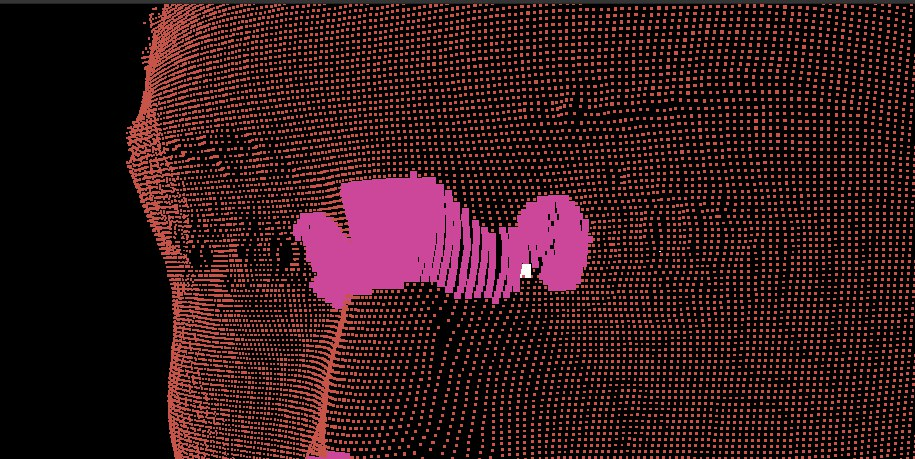

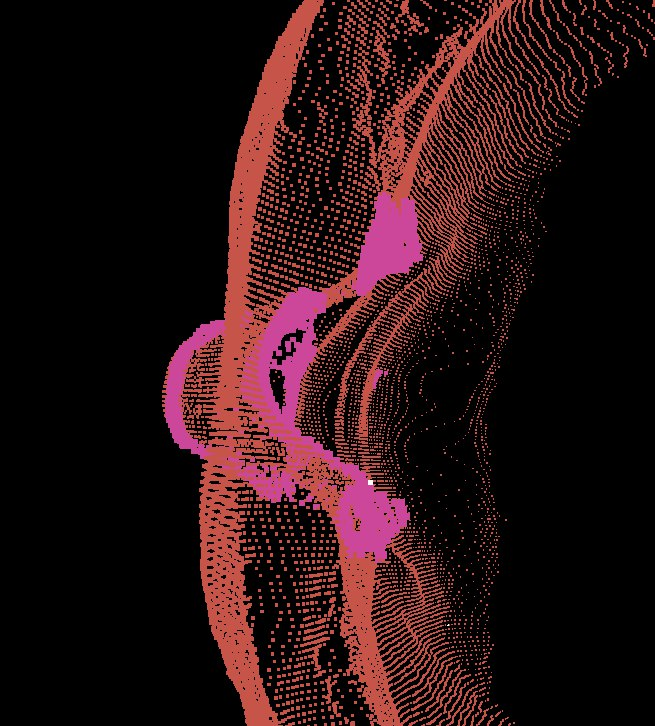

### Experimento 04: Canto interno do olho direito

Filtros utilizados:
- Curvatura Média: [0.05, 0.07]

Porcentagem reduzida (média): 95.70193491778117

Porcentagem reduzida (variância): 1.8675715508049913

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 5385.0
- Mínimo: 438.0
- Média: 1608.9256880733944
- Variância: 325125.33331565396

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 1689 (38.7%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 2671 (61.3%)

### Experimento 05: Canto interno do olho direito

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

Porcentagem reduzida (média): 94.91922274408608

Porcentagem reduzida (variância): 7.0186461679532846

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 12576.0
- Mínimo: 0
- Média: 1889.68623853211
- Variância: 1038187.7560849534

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 2949 (67.6%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 1411 (32.4%)

### Experimento 06: Canto interno do olho direito

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

Porcentagem reduzida (média): 96.69538428818099

Porcentagem reduzida (variância): 3.082608386557778

Número de pontos que não possuem o ponto fiducial marcado: 306

Nuvem filtrada:
- Máximo: 7933.0
- Mínimo: 45.0
- Média: 1226.5465596330275
- Variância: 441284.56447542884

---

Total de nuvens: 4360

Total de nuvens que possuem o ponto fiducial na região filtrada: 2592 (59.4%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 1768 (41.6%)

### Experimento 01: Canto interno do olho esquerdo

Filtros utilizados:
- Verticalidade: [0, 0.1]
- Anisotropia: [0.8, 0.96]

Porcentagem reduzida (média): 94.94967879240451

Porcentagem reduzida (variância): 6.850021337195611

Número de pontos que não possuem o ponto fiducial marcado: 520

Nuvem filtrada:
- Máximo: 12576.0
- Mínimo: 10
- Média: 1877.875542691751
- Variância: 1005329.9068226849

---

Total de nuvens: 4146

Total de nuvens que possuem o ponto fiducial na região filtrada: 2315 (55.8%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 1831 (44.2%)

### Experimento 02: Canto interno do olho esquerdo

Filtros utilizados:
- Curvatura Gaussiana: [0.002, 0.008]

Porcentagem reduzida (média): 94.8818408045049

Porcentagem reduzida (variância): 1.942176220259298

Número de pontos que não possuem o ponto fiducial marcado: 520

Nuvem filtrada:
- Máximo: 8227.0
- Mínimo: 414.0
- Média: 1905.9956584659913
- Variância: 323139.55607282324

---

Total de nuvens: 4146

Total de nuvens que possuem o ponto fiducial na região filtrada: 3157 (76.1%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 989 (23.9%)

### Experimento 03: Canto interno do olho esquerdo

Filtros utilizados:
- Esfericidade [0.04, 0.1]
- Verticalidade [0, 0.1]

Porcentagem reduzida (média): 96.73080154786972

Porcentagem reduzida (variância): 2.9870457991077193

Número de pontos que não possuem o ponto fiducial marcado: 520

Nuvem filtrada:
- Máximo: 7933.0
- Mínimo: 45.0
- Média: 1212.718523878437
- Variância: 423657.4042261439

---

Total de nuvens: 4146

Total de nuvens que possuem o ponto fiducial na região filtrada: 1986 (45.7%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 2160 (54.3%)

### Experimento 01: Ponta do nariz

Filtros utilizados:
- Curvatura Gaussiana: [0.005, 0.02]

Porcentagem reduzida (média): 97.55694698718187

Porcentagem reduzida (variância): 0.7925572269600241

Número de pontos que não possuem o ponto fiducial marcado: 4

Nuvem filtrada:
- Máximo: 6759.0
- Mínimo: 0
- Média: 903.9101244101244
- Variância: 119802.83272733915

---

Total de nuvens: 4662

Total de nuvens que possuem o ponto fiducial na região filtrada: 3974 (82.2%)

Total de nuvens que não possuem o ponto fiducial na região filtrada: 688 (17.8%)

Das 688 nuvens, a figura abaixo mostra a proporção por tipo de nuvem:

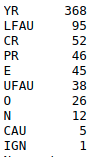

YR (yaw rotation)

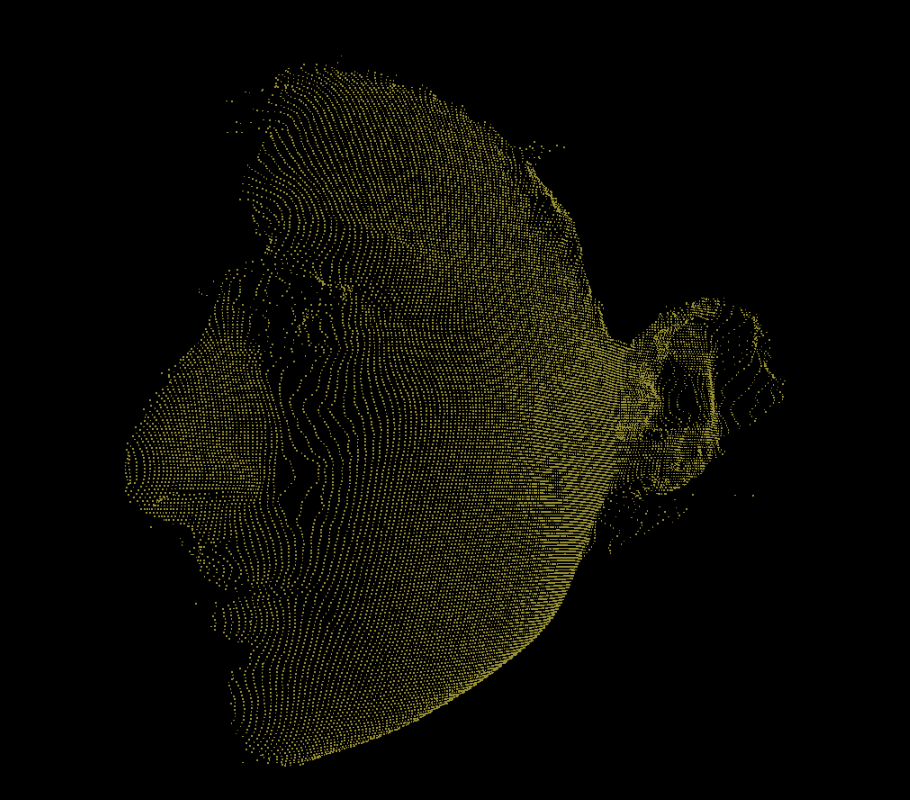

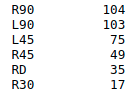